# Task : Build a recurrent neural network (LSTM) to classify MNIST digits dataset, using TensorFlow

##**Importing Pre-requisite python models**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers

def init_weights(shape, name=None):
    return initializers.normal(shape, scale=0.01, name=name)

##**Declaring hyper parameters , and Parameters for LSTM network**

In [ ]:
# Hyper parameters
batch_size = 128    # represent how many number of images you want to feed into LSTM cells 
nb_epoch = 20

# Parameters for MNIST dataset
img_rows, img_cols = 28, 28     #1 image is divided into 28 * 28 pixel values where each pixel has a range of 255 
nb_classes = 10

# Parameters for LSTM network
nb_lstm_outputs = 30
nb_time_steps = img_rows      # time- steps are taken as 28 that means the LSTM network will run 28 times per image where in each step it will take input of 1st row of 1st image 
dim_input_vector = img_cols

### **The MNIST data is split into training sets , testing sets, validation sets**





In [ ]:
# here I have used test_train_split to further split the (X_train, y_train) to  (X_train, X_val, y_train, y_val)

from sklearn.model_selection import train_test_split 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


input_shape = (nb_time_steps, dim_input_vector)

#preprocessed the X_train , X_test and changed the shape of y_train, y_test, y_evaluate

# we can normalize data before hands such that large terms of the calculations can be reduced to smaller terms. 
# Like, we can normalize the x_train and x_test data by dividing it by 255.

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.

# Since the output of the model can comprise any of the digits between 0 to 9.
# so, we need 10 classes in output. To make output for 10 classes, use keras.utils.to_categorical function,
# which will provide the 10 columns. Out of these 10 columns,
# only one value will be one and the rest 9 will be zero and this one value of the output will denote the class of the digit.

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)

#printing X_train,Y_train, X_test, Y_test, X_val, Y_val shapes.
# note here that the y_test shape is scalar (10000,) while Y_test shape is 2D (10000, 10)-----> due to above code.

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print('X_val shape:', X_val.shape)
print('Y_val shape:', Y_val.shape)

# summarizing train, test , validation samples.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (48000, 28, 28)
Y_train shape: (48000, 10)
X_test shape: (10000, 28, 28)
Y_test shape: (10000, 10)
X_val shape: (12000, 28, 28)
Y_val shape: (12000, 10)
48000 train samples
10000 test samples


##**Visualizing the MNIST data**

####**Plotting  the images along with the label as numerical values if we use y_train.** 

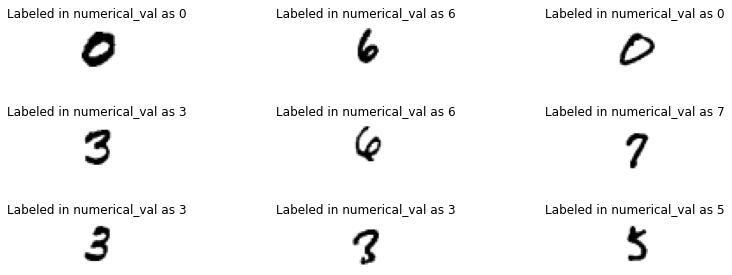

In [ ]:
plt.figure(figsize=(15,4.5))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.title('Labeled in numerical_val as {label}'.format(label=y_train[i]))
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=1)
plt.show()

####**Plotting  the images along with the label as its one hot encoded form which was stored in Y_train as shown below** 


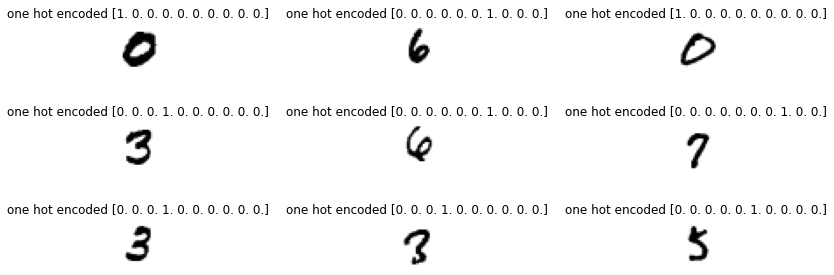

In [ ]:
plt.figure(figsize=(15,4.5))
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.title('one hot encoded {label}'.format(label=Y_train[i])) # here is the change :)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=1)
plt.show()

##**Build LSTM network through sequential model**

In [ ]:
# Build LSTM network
model = Sequential()
model.add(LSTM(nb_lstm_outputs, input_shape=input_shape))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30)                7080      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 7,390
Trainable params: 7,390
Non-trainable params: 0
_________________________________________________________________


##**Acquiring model history**

The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

Here this includes the loss and the accuracy (for classification problems)

In [ ]:
history = model.fit(X_train, Y_train, epochs=nb_epoch, validation_data = (X_val, Y_val))


Epoch 1/20
1500/1500 [==============================] - 20s 12ms/step - loss: 0.7763 - accuracy: 0.7602 - val_loss: 0.3418 - val_accuracy: 0.8986
Epoch 2/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2776 - accuracy: 0.9171 - val_loss: 0.2068 - val_accuracy: 0.9417
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1836 - accuracy: 0.9459 - val_loss: 0.1831 - val_accuracy: 0.9462
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1444 - accuracy: 0.9579 - val_loss: 0.1398 - val_accuracy: 0.9588
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1225 - accuracy: 0.9643 - val_loss: 0.1196 - val_accuracy: 0.9655
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1061 - accuracy: 0.9684 - val_loss: 0.1083 - val_accuracy: 0.9693
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0949 - accuracy: 0.9720 - val_loss: 0.1119 -

##**Evaluating Loss , Accuracy**

In [ ]:
evaluation = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

79/79 [==============================] - 1s 9ms/step - loss: 0.0753 - accuracy: 0.9794
Summary: Loss over the test dataset: 0.08, Accuracy: 0.98


##**Visualizing and Plotting Loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


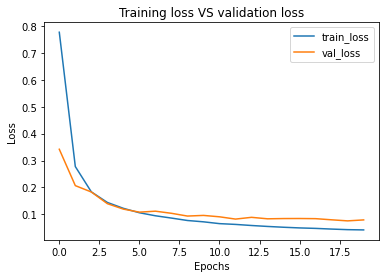

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(6, 4))                   # making the graph scale big 
plt.plot(history.history['loss'])             # plotting loss key of history
plt.plot(history.history['val_loss'])         # ploting validation loss 
plt.title('Training loss VS validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'val_loss'], loc='upper right')

plt.show()

##**Visualizing and Plotting Accuracy**

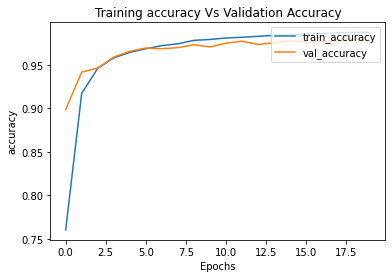

In [ ]:

plt.figure(figsize=(6, 4))                   # making the graph scale big 
plt.plot(history.history['accuracy'])         # ploting validation loss 
plt.plot(history.history['val_accuracy'])         # ploting validation loss 

plt.title('Training accuracy Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper right')


plt.show()

##**Finally showing model predicted value**

Model Predicted one hot encoded form: 
[1.9996548e-07 1.0462644e-06 1.4459002e-05 6.3955587e-05 2.0830514e-07
 5.5986939e-06 3.9419082e-10 9.9990106e-01 1.0360257e-06 1.2263427e-05]

Model rounded prediction: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

Model predicted label: 7

Actual label: 7



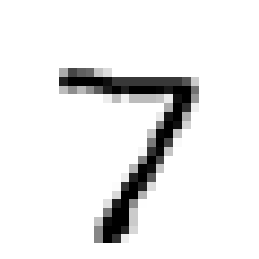

In [ ]:
import numpy as np
predictions = model.predict(X_test)

plt.figure(figsize=(15,4.5))
# predictions = model.predict(y_test)
for i in range(1):  
    print('Model Predicted one hot encoded form: \n{label}\n'.format(label=(predictions[i])))
    print('Model rounded prediction: {label}\n'.format(label=np.round(predictions[i])))
    print('Model predicted label: {label}\n'.format(label = np.argmax(np.round(predictions[i]))))
    print('Actual label: {label}\n'.format(label = y_test[i]))
    # print(Model predicted number from 0 to 1)
    plt.subplot(1, 1, i+1)
    # plt.title('Model Predicted Label: {label}'.format(label=(predictions[i])))
    
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    

    plt.axis('off')
plt.subplots_adjust(wspace=1, hspace=0)
plt.show()

